# **Prodigy Infotech**

# **Data Science Internship**

# **Task - Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

# **Coder - Satyam Raj**

Data Preprocessing:

Load and preprocess the dataset, keeping only the relevant columns.

Download and Load the Dataset:

Download the "Twitter US Airline Sentiment" dataset from Kaggle (https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

Extract the downloaded file and use the "Tweets.csv" file.

In [8]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data_path = "/content/Tweets.csv"
data = pd.read_csv(data_path)

# Keep only relevant columns
data = data[['airline_sentiment', 'text', 'airline', 'tweet_created']]

print(data.head())


  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

          airline              tweet_created  
0  Virgin America  2015-02-24 11:35:52 -0800  
1  Virgin America  2015-02-24 11:15:59 -0800  
2  Virgin America  2015-02-24 11:15:48 -0800  
3  Virgin America  2015-02-24 11:15:36 -0800  
4  Virgin America  2015-02-24 11:14:45 -0800  


Sentiment Analysis:

Analyze sentiment for each tweet using the TextBlob library.

In [9]:
# Analyze sentiment for each tweet
data['Sentiment_Score'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Sentiment_Label'] = data['Sentiment_Score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

print(data.head())


  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

          airline              tweet_created  Sentiment_Score Sentiment_Label  
0  Virgin America  2015-02-24 11:35:52 -0800         0.000000         neutral  
1  Virgin America  2015-02-24 11:15:59 -0800         0.000000         neutral  
2  Virgin America  2015-02-24 11:15:48 -0800        -0.390625        negative  
3  Virgin America  2015-02-24 11:15:36 -0800         0.006250        positive  
4  Virgin America  2015-02-24 11:14:45 -0800        -0.350000        negative  


Sentiment Distribution Across Airlines:

Visualize sentiment distribution across different airlines.

<Figure size 1000x600 with 0 Axes>

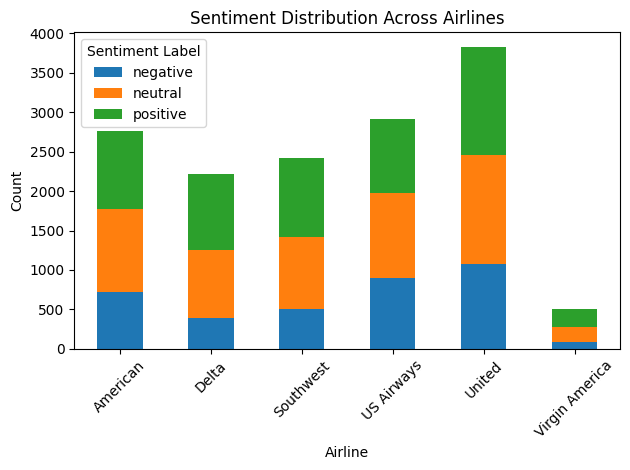

In [10]:
# Count sentiment labels for each airline
airline_sentiment_counts = data.groupby(['airline', 'Sentiment_Label']).size().unstack(fill_value=0)

# Create stacked bar plots
plt.figure(figsize=(10, 6))
airline_sentiment_counts.plot(kind='bar', stacked=True)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Distribution Across Airlines')
plt.legend(title='Sentiment Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sentiment Over Time:

Visualize sentiment over time using a line plot.

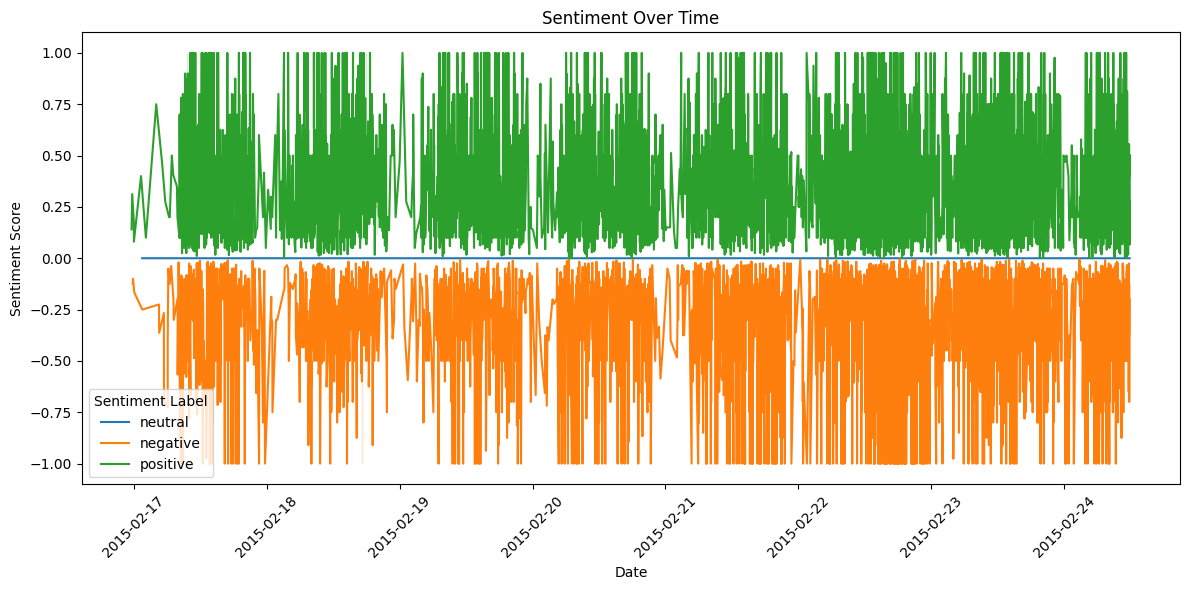

In [11]:
# Convert tweet_created to datetime
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

# Create a line plot of sentiment over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='tweet_created', y='Sentiment_Score', hue='Sentiment_Label')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Over Time')
plt.legend(title='Sentiment Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visualization:

Visualize sentiment patterns using a bar plot.

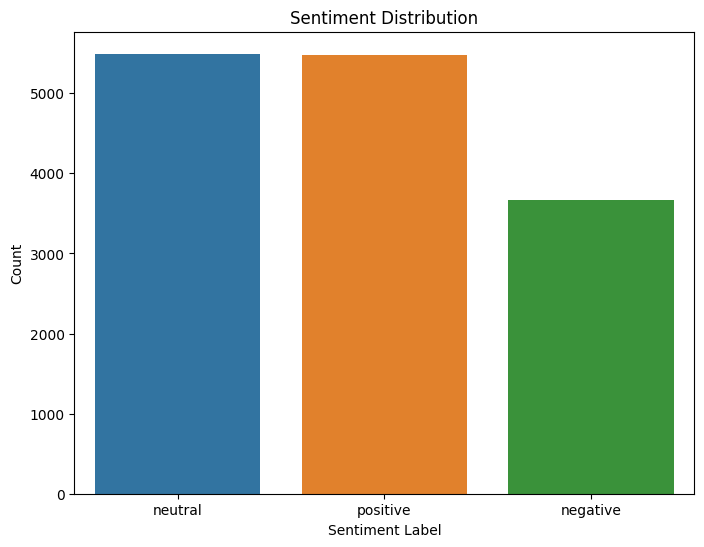

In [12]:
# Count sentiment labels
sentiment_counts = data['Sentiment_Label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


Word Clouds:

Generate word clouds for positive and negative sentiments.

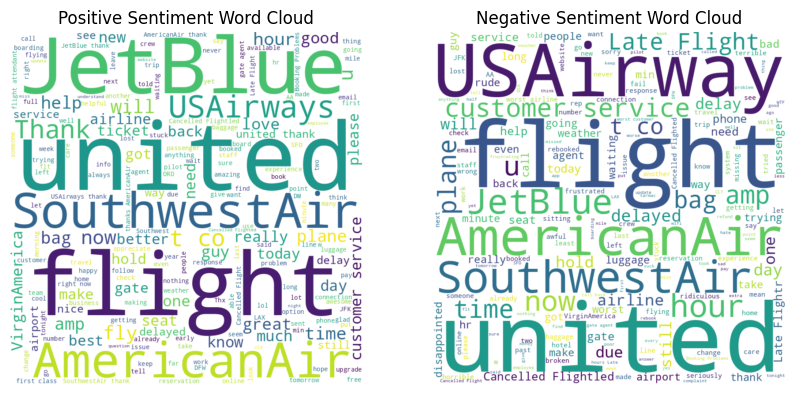

In [13]:
# Sample positive and negative tweets
positive_texts = data[data['Sentiment_Label'] == 'positive']['text']
negative_texts = data[data['Sentiment_Label'] == 'negative']['text']

# Generate word clouds
positive_cloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(positive_texts))
negative_cloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(negative_texts))

# Plot word clouds
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

plt.show()
